# **Pachages and modules import**

In [1]:
from modules.modeling import *

# **Data import**

In [3]:
cardio_dataframe = pd.read_csv("data/cardio_train.csv", sep = ';')
cardio_dataframe.drop(["id"], axis = 1, inplace=True)
cardio_dataframe.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0  18393       2     168    62.0    110     80            1     1      0   
1  20228       1     156    85.0    140     90            3     1      0   
2  18857       1     165    64.0    130     70            3     1      0   
3  17623       2     169    82.0    150    100            1     1      0   
4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

# **Model choice**

In [4]:
df = cardio_dataframe.copy()

	> KNeighborsClassifier()
Train Score = 78.07


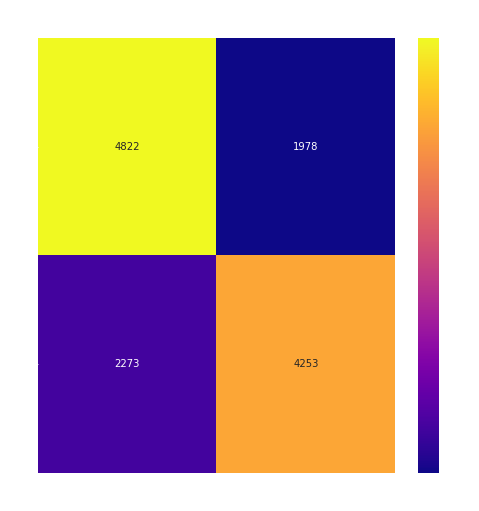

	> Classification test report

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      6800
           1       0.68      0.65      0.67      6526

    accuracy                           0.68     13326
   macro avg       0.68      0.68      0.68     13326
weighted avg       0.68      0.68      0.68     13326

#############################
	> LogisticRegression(random_state=0)
Train Score = 69.65


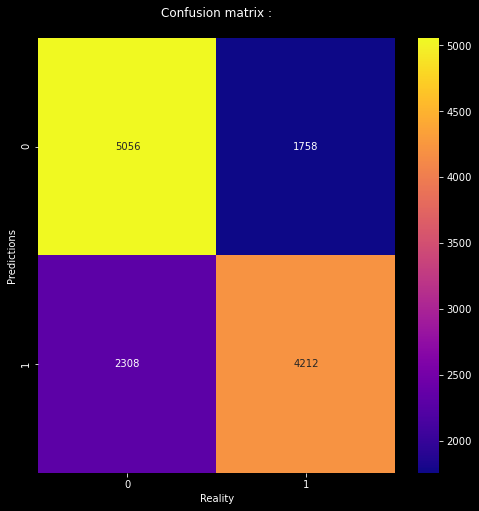

	> Classification test report

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      6814
           1       0.71      0.65      0.67      6520

    accuracy                           0.70     13334
   macro avg       0.70      0.69      0.69     13334
weighted avg       0.70      0.70      0.69     13334

#############################
	> LinearDiscriminantAnalysis()
Train Score = 64.79


	> Classification test report

              precision    recall  f1-score   support

           0       0.64      0.69      0.67      6801
           1       0.65      0.60      0.62      6509

    accuracy                           0.65     13310
   macro avg       0.65      0.65      0.65     13310
weighted avg       0.65      0.65      0.65     13310

#############################
	> DecisionTreeClassifier(random_state=0)
Train Score = 99.98


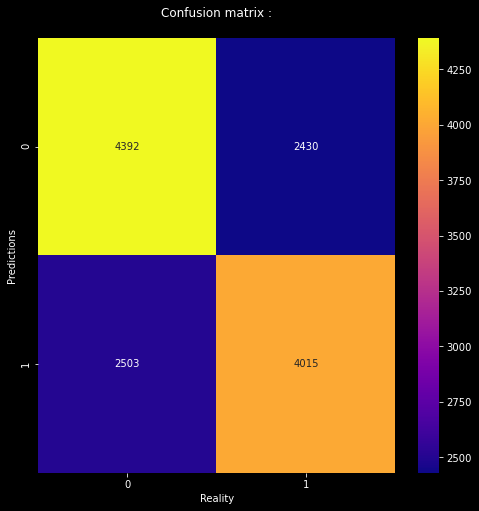

	> Classification test report

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      6822
           1       0.62      0.62      0.62      6518

    accuracy                           0.63     13340
   macro avg       0.63      0.63      0.63     13340
weighted avg       0.63      0.63      0.63     13340

#############################
	> RandomForestClassifier(random_state=0)
Train Score = 99.98


	> Classification test report

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      6804
           1       0.71      0.68      0.70      6505

    accuracy                           0.71     13309
   macro avg       0.71      0.71      0.71     13309
weighted avg       0.71      0.71      0.71     13309

#############################


In [5]:
model_list = [
    KNeighborsClassifier(),
    LogisticRegression(random_state=0),
    LinearDiscriminantAnalysis(),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0)
]

for model in model_list :
    print("\t>",model)
    evaluation(model, df, "cardio")
    print("#############################")

*The best model with the best train and test score is RandomForestClassifier*

*There is a large gap between these two scores, is our model overfitting ?*

# **First model application**

Train Score = 99.98


	> Classification test report

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      6807
           1       0.71      0.68      0.70      6508

    accuracy                           0.71     13315
   macro avg       0.71      0.71      0.71     13315
weighted avg       0.71      0.71      0.71     13315



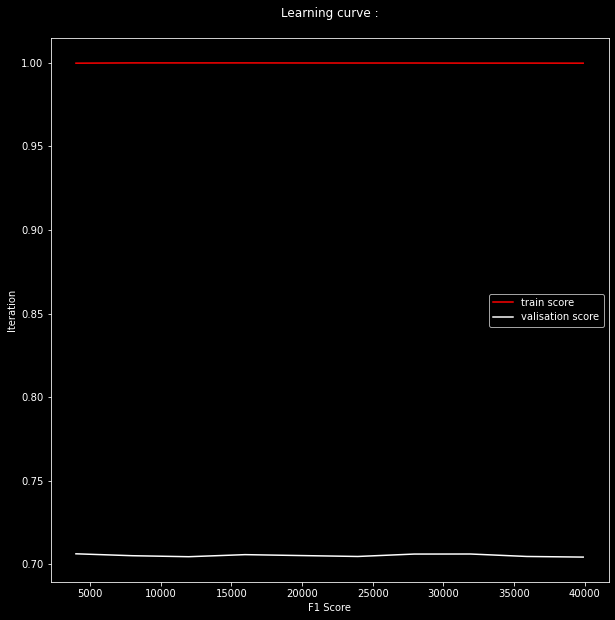

In [71]:
# model initialisation 
model =  RandomForestClassifier(random_state=0)

# evaluation
evaluation_with_learning_curve(model, df, "cardio")

Our model is overfiting !

Let's try less complexe model even if it's less performant on train set.

# **Less complex models test**

### **KNN**


	==> Train Score = 77.94




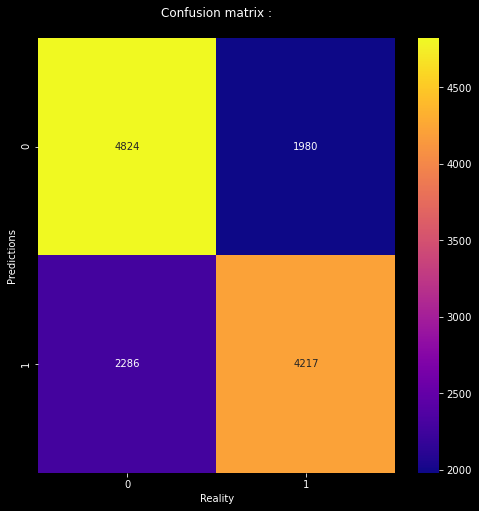

	> Classification test report

              precision    recall  f1-score   support

           0       0.68      0.71      0.69      6804
           1       0.68      0.65      0.66      6503

    accuracy                           0.68     13307
   macro avg       0.68      0.68      0.68     13307
weighted avg       0.68      0.68      0.68     13307



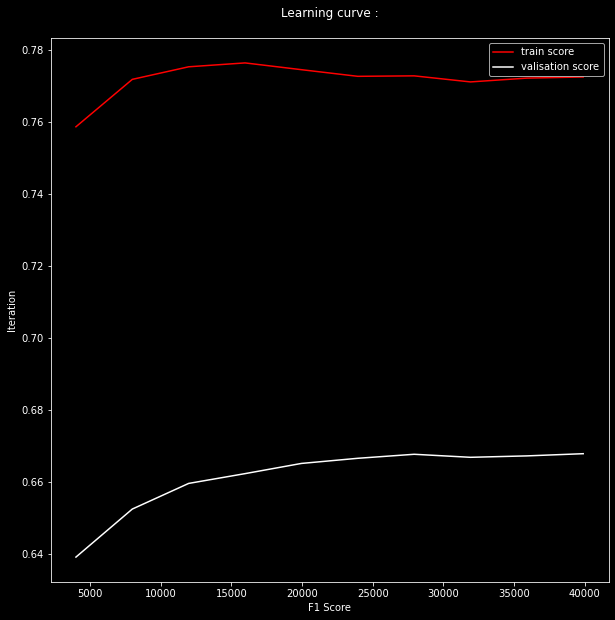

In [101]:
model =  KNeighborsClassifier(n_jobs=-1)

# evaluation
evaluation_with_learning_curve(model, df, "cardio")


*It's better, we have less deviation between train score and validation score !*

*What if we add some features to try to increase our scores ?*

# **Some feature engineering**

### **Which columns to add ?**

We can see that there is some features which are not too correlated. Let's fix remove some features.

Aditionnaly, after some researches on internet ( https://www.tourmyindia.com/medical-tourism/blog/cardiovascular-diseases-causes-symptoms-treatment/ )  we can easily see there are a lot of parameters which are influent on the cardiovascular diseases. We have a part of them, but ther is some missing parameters.

The BMI is one of these paramters.

### **Feature engineering (BMI)**

In [8]:
df_bis = df.copy()
df_bis['BMI'] = round( (df_bis['weight'] / ( (df_bis['height']/100)**2 )), 1)
df_bis = df_bis.drop(['gender', 'smoke', 'alco', 'active'], axis=1)
df_bis.head()

age  height  weight  ap_hi  ap_lo  cholesterol  gluc  cardio   BMI
0  18393     168    62.0    110     80            1     1       0  22.0
1  20228     156    85.0    140     90            3     1       1  34.9
2  18857     165    64.0    130     70            3     1       1  23.5
3  17623     169    82.0    150    100            1     1       1  28.7
4  17474     156    56.0    100     60            1     1       0  23.0

### **Model testing**

### KNN


	==> Train Score = 77.94




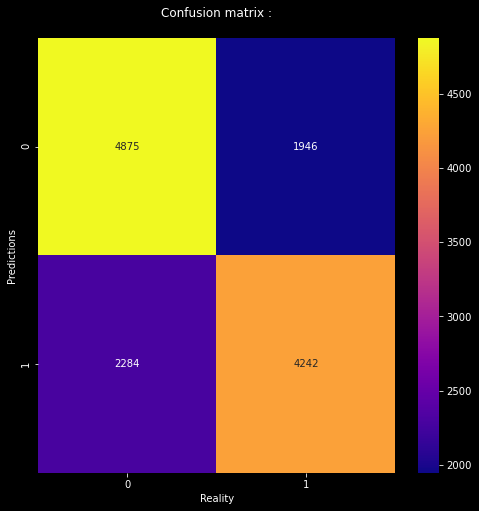

	> Classification test report

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      6821
           1       0.69      0.65      0.67      6526

    accuracy                           0.68     13347
   macro avg       0.68      0.68      0.68     13347
weighted avg       0.68      0.68      0.68     13347



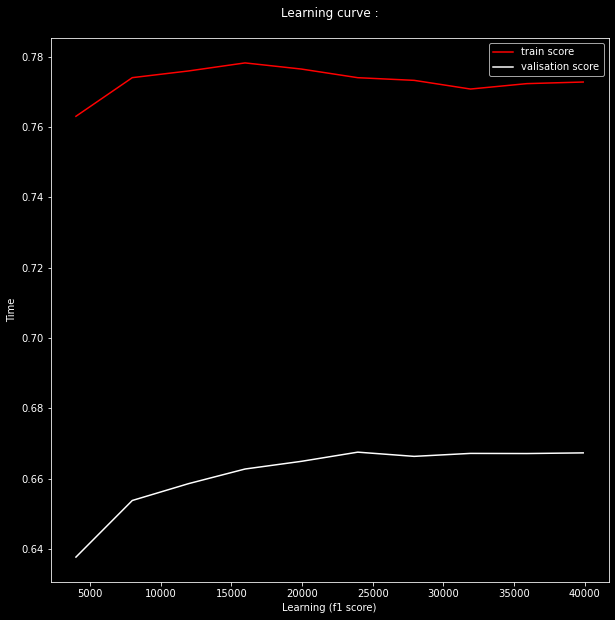

In [109]:
model =  KNeighborsClassifier(n_jobs=-1)
# evaluation
evaluation_with_learning_curve(model, df_bis, "cardio")

*It's a littl bit better*

*The KNN model's learning curve have a better shape than before but this improvement is insignificant ...*

# **Model optimisation**

To resolve the overfitting issue we tried to :
- Remove features
- Choose less complex model

The best we obtained is 68% score, on test set.

Maybe to improve our results we should optimise our model ?

Let's try this !

### **KNN**

In [138]:
X = df_bis.drop(['cardio'], axis = 1)
y = df_bis['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

k_range = [10,20,30,40]
n_jobs = [-1]
knn_params = dict(n_neighbors=k_range, n_jobs=n_jobs)

grid_search = GridSearchCV(KNeighborsClassifier(),param_grid=knn_params, n_jobs=-1, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_jobs': [-1], 'n_neighbors': [10, 20, 30, 40]},
             scoring='accuracy')

In [139]:
print("best parameters :\n\t>",grid_search.best_params_)

best paraùeters :
	> {'n_jobs': -1, 'n_neighbors': 30}



	==> Train Score = 72.87




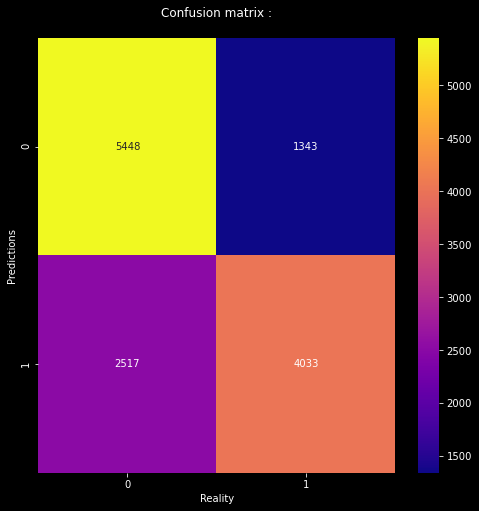

	> Classification test report

              precision    recall  f1-score   support

           0       0.68      0.80      0.74      6791
           1       0.75      0.62      0.68      6550

    accuracy                           0.71     13341
   macro avg       0.72      0.71      0.71     13341
weighted avg       0.72      0.71      0.71     13341



In [137]:
model =  grid_search.best_estimator_
# evaluation
evaluation_with_learning_curve(model, df_bis, "cardio")

#### **Bingo !!! We can do more to have a better model but for this application, we will keep it like this**

# **Model export**

### **Model training**

In [9]:
model = model_training(KNeighborsClassifier(n_neighbors = 30), df_bis, "cardio")

	> Classification test report

              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6774
           1       0.75      0.62      0.68      6557

    accuracy                           0.71     13331
   macro avg       0.72      0.71      0.71     13331
weighted avg       0.72      0.71      0.71     13331



### **Model save**

In [10]:
with open("model/knn_model.pkl", "wb") as f :
    pickle.dump(model, f)